<a href="https://colab.research.google.com/github/zube80/ProjectTask-Booking-Hotel/blob/main/cancellation_modelling_group_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1c8zJrgCloC0oN3AVwlD8xq7nrkT_xnBG/edit#gid=995572489'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
data_set = pd.read_csv(sheet_url_trf)

In [ ]:
##Finding null values
null_values = pd.DataFrame ({'Null Values': data_set.isna().sum(), 'Percentage of Null ': data_set.isna().sum()/(data_set.shape[0])*(100)})
null_values

,Null Values,Percentage of Null
a,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [ ]:
data_set['deposit_type'].value_counts()

deposit_type
No Deposit    38199
Non Refund     1719
Refundable      142
Name: count, dtype: int64

In [ ]:
#At this point we replace null data at country using mode
data_copy = data_set.copy()
data_copy['country'].fillna(data_copy['country'].mode()[0], axis=0, inplace=True)

In [ ]:
##Next, after ensuring that there is no missing value on the required column, we can drop unnecessary columns
drop = ['hotel','arrival_date_week_number','arrival_date_day_of_month','agent','company','reservation_status','reservation_status_date']
data_copy.drop(drop, axis=1, inplace= True)

KeyError: "['hotel'] not found in axis"

In [ ]:
##Find out the categorical columns
cat_cols = [col for col in data_copy.columns if data_copy[col].dtype == 'O']
cat_cols

['a',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [ ]:
cat_data4 = data_copy[cat_cols]

In [ ]:
#Let's check every unique ID
print ('Meal Unique Id: ',cat_data4['meal'].unique())
print ('\n')
print ('Arrival_date_month: ',cat_data4['arrival_date_month'].unique())
print ('\n')
print ('country: ',cat_data4['country'].unique())
print ('\n')
print ('market_segment: ',cat_data4['market_segment'].unique())
print ('\n')
print ('distribution channel: ',cat_data4['distribution_channel'].unique())
print ('\n')
print ('reserved_room_type: ',cat_data4['reserved_room_type'].unique())
print ('\n')
print ('assigned_room_type: ',cat_data4['assigned_room_type'].unique())
print ('\n')
print ('deposit_type: ',cat_data4['deposit_type'].unique())
print ('\n')
print ('customer_type: ',cat_data4['customer_type'].unique())

Meal Unique Id:  ['BB' 'FB' 'HB' 'SC' 'Undefined']


Arrival_date_month:  ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


country:  ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI']


market_segment:  ['Direct' 'Corporate'

In [ ]:
##Transforming into ordinal data
cat_data4['meal'] = cat_data4['meal'].map({'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
cat_data4['reserved_room_type'] = cat_data4['reserved_room_type'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 11, 'P': 15})
cat_data4['assigned_room_type'] = cat_data4['assigned_room_type'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'L': 11, 'P': 15})
cat_data4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,July,0,PRT,Direct,Direct,2,2,No Deposit,Transient
1,July,0,PRT,Direct,Direct,2,2,No Deposit,Transient
2,July,0,GBR,Direct,Direct,0,2,No Deposit,Transient
3,July,0,GBR,Corporate,Corporate,0,0,No Deposit,Transient
4,July,0,GBR,Online TA,TA/TO,0,0,No Deposit,Transient


In [ ]:
y = OneHotEncoder (sparse=False)
y = y.fit_transform(cat_data4[['arrival_date_month']])
df_y = pd.DataFrame(y)
df_y

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40056,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40057,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_y.rename(columns = {0: 'Apr', 1: 'Aug', 2: 'Dec', 3: 'Feb', 4: 'Jan', 5: 'Jul', 6:'Jun', 7: 'Mar', 8: 'May', 9: 'Nov', 10: 'November', 11: 'Sept'}, inplace=True)

In [ ]:
##We join the transformed column into the main table
cat_data4 = cat_data4.join(df_y)
cat_data4

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,Apr,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,November,Sept
0,July,0,PRT,Direct,Direct,2,2,No Deposit,Transient,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,July,0,PRT,Direct,Direct,2,2,No Deposit,Transient,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,July,0,GBR,Direct,Direct,0,2,No Deposit,Transient,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,July,0,GBR,Corporate,Corporate,0,0,No Deposit,Transient,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,July,0,GBR,Online TA,TA/TO,0,0,No Deposit,Transient,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,August,0,GBR,Offline TA/TO,TA/TO,0,0,No Deposit,Transient,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40056,August,0,IRL,Direct,Direct,4,4,No Deposit,Transient-Party,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40057,August,0,IRL,Direct,Direct,4,4,No Deposit,Transient,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40058,August,2,GBR,Offline TA/TO,TA/TO,3,3,No Deposit,Contract,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##One Hot Encoding Transforming Market Segment
z = OneHotEncoder (sparse=False)
z = z.fit_transform(cat_data4[['market_segment']])
df_z = pd.DataFrame(z)

####One Hot Encoding Transforming Customer Type
x2 = OneHotEncoder (sparse=False)
x2 = x2.fit_transform(cat_data4[['customer_type']])
df_x2 = pd.DataFrame(x2)

####One Hot Encoding Transforming Distribution Channel
x = OneHotEncoder (sparse=False)
x = x.fit_transform(cat_data4[['distribution_channel']])
df_x = pd.DataFrame(x)

####One Hot Encoding Transforming Deposit type
x1 = OneHotEncoder (sparse=False)
x1 = x1.fit_transform(cat_data4[['deposit_type']])
df_x1 = pd.DataFrame(x1)


In [ ]:
##Renaming the Columns
df_z.rename(columns = {0: 'Complementary', 1: 'Corporates', 2: 'Directs', 3: 'Groups', 4: 'Offline TA/TO', 5: 'Online TA'}, inplace=True)
df_x2.rename(columns = {0: 'Contract', 1: 'Group', 2: 'Transient', 3: 'Transient_Party'}, inplace=True)
df_x1.rename(columns = {0: 'No Deposit', 1: 'No Refund', 2: 'Refundable'}, inplace=True)
df_x.rename(columns = {0: 'Corporate', 1: 'Direct', 2: 'TA/TO', 3: 'Undefined'}, inplace=True)

In [ ]:
##Join Transformed column into our main data table
cat_data4 = cat_data4.join(df_z)
cat_data4 = cat_data4.join(df_x2)
cat_data4 = cat_data4.join(df_x1)
cat_data4 = cat_data4.join(df_x)
cat_data4.head()

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,Apr,...,Group,Transient,Transient_Party,No Deposit,No Refund,Refundable,Corporate,Direct,TA/TO,Undefined
0,July,0,PRT,Direct,Direct,2,2,No Deposit,Transient,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,July,0,PRT,Direct,Direct,2,2,No Deposit,Transient,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,July,0,GBR,Direct,Direct,0,2,No Deposit,Transient,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,July,0,GBR,Corporate,Corporate,0,0,No Deposit,Transient,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,July,0,GBR,Online TA,TA/TO,0,0,No Deposit,Transient,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
cat_data4['country'] = cat_data4['country'].map({'PRT': 'PRT1', 'GBR': 'GBR1', 'USA': 'OTHER', 'ESP':'ESP1', 'IRL':'IRL1', 'FRA':'FRA1',
                                                   'ROU':'OTHER', 'NOR':'OTHER', 'OMN': 'OTHER','ARG': 'OTHER', 'POL':'OTHER', 'DEU':'DEU1',
                                                   'BEL':'OTHER', 'CHE':'OTHER', 'CN':'OTHER', 'GRC':'OTHER', 'ITA' : 'ITA1', 'NLD':'OTHER',
                                                   'DNK':'OTHER', 'RUS':'OTHER', 'SWE':'OTHER', 'AUS':'OTHER', 'EST':'OTHER',
                                                   'CZE':'OTHER', 'BRA':'OTHER', 'FIN':'OTHER', 'MOZ':'OTHER', 'BWA':'OTHER',
                                                   'LUX':'OTHER', 'SVN':'OTHER', 'ALB':'OTHER', 'IND':'OTHER', 'CHN':'OTHER',
                                                   'MEX':'OTHER', 'MAR':'OTHER', 'UKR':'OTHER', 'SMR':'OTHER', 'LVA':'OTHER',
                                                   'PRI':'OTHER', 'SRB':'OTHER', 'CHL':'OTHER', 'AUT':'OTHER', 'BLR':'OTHER',
                                                   'LTU':'OTHER', 'TUR':'OTHER', 'ZAF':'OTHER', 'AGO':'OTHER', 'ISR':'OTHER',
                                                   'CYM':'OTHER', 'ZMB':'OTHER', 'CPV':'OTHER', 'ZWE':'OTHER', 'DZA':'OTHER',
                                                   'KOR':'OTHER', 'CRI':'OTHER', 'HUN':'OTHER', 'ARE':'OTHER', 'TUN':'OTHER',
                                                   'JAM':'OTHER', 'HRV':'OTHER', 'HKG':'OTHER', 'IRN':'OTHER', 'GEO':'OTHER',
                                                   'AND':'OTHER', 'GIB':'OTHER', 'URY':'OTHER', 'JEY':'OTHER', 'CAF':'OTHER',
                                                   'CYP':'OTHER', 'COL':'OTHER', 'GGY':'OTHER', 'KWT':'OTHER', 'NGA':'OTHER',
                                                   'MDV':'OTHER', 'VEN':'OTHER', 'SVK':'OTHER', 'FJI':'OTHER', 'KAZ':'OTHER',
                                                   'PAK':'OTHER', 'IDN':'OTHER', 'LBN':'OTHER', 'PHL':'OTHER', 'SEN':'OTHER',
                                                   'SYC':'OTHER', 'AZE':'OTHER', 'BHR':'OTHER', 'NZL':'OTHER', 'THA':'OTHER',
                                                   'DOM':'OTHER', 'MKD':'OTHER', 'MYS':'OTHER', 'ARM':'OTHER', 'JPN':'OTHER',
                                                   'LKA':'OTHER', 'CUB':'OTHER', 'CMR':'OTHER', 'BIH':'OTHER', 'MUS':'OTHER',
                                                   'COM':'OTHER', 'SUR':'OTHER', 'UGA':'OTHER', 'BGR':'OTHER', 'CIV':'OTHER',
                                                   'JOR':'OTHER', 'SYR':'OTHER', 'SGP':'OTHER', 'BDI':'OTHER', 'SAU':'OTHER',
                                                   'VNM':'OTHER', 'PLW':'OTHER', 'QAT':'OTHER', 'EGY':'OTHER', 'PER':'OTHER',
                                                   'MLT':'OTHER', 'MWI':'OTHER', 'ECU':'OTHER', 'MDG':'OTHER', 'ISL':'OTHER',
                                                   'UZB':'OTHER', 'NPL':'OTHER', 'BHS':'OTHER', 'MAC':'OTHER', 'TGO':'OTHER',
                                                   'TWN':'OTHER','DJI':'OTHER'})

In [ ]:
####One Hot Encoding Transforming Country
x3 = OneHotEncoder (sparse=False)
x3 = x3.fit_transform(cat_data4[['country']])
df_x3 = pd.DataFrame(x3)
df_x3.rename(columns = {0: 'DEU', 1: 'ESP', 2: 'FRA', 3: 'GBR', 4: 'IRL', 5: 'ITA', 6: 'OTHER', 7:'PRT'}, inplace=True)
cat_data4 = cat_data4.join(df_x3)

In [ ]:
##Dropping origin columns
col = ['country','arrival_date_month', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']
cat_data4.drop(col, axis=1, inplace = True)
cat_data4.head()

,meal,reserved_room_type,assigned_room_type,Apr,Aug,Dec,Feb,Jan,Jul,Jun,...,TA/TO,Undefined,DEU,ESP,FRA,GBR,IRL,ITA,OTHER,PRT
0,0,2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
cat_data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meal                40060 non-null  int64  
 1   reserved_room_type  40060 non-null  int64  
 2   assigned_room_type  40060 non-null  int64  
 3   Apr                 40060 non-null  float64
 4   Aug                 40060 non-null  float64
 5   Dec                 40060 non-null  float64
 6   Feb                 40060 non-null  float64
 7   Jan                 40060 non-null  float64
 8   Jul                 40060 non-null  float64
 9   Jun                 40060 non-null  float64
 10  Mar                 40060 non-null  float64
 11  May                 40060 non-null  float64
 12  Nov                 40060 non-null  float64
 13  November            40060 non-null  float64
 14  Sept                40060 non-null  float64
 15  Complementary       40060 non-null  float64
 16  Corp

In [ ]:
##Droping some columns from dataset
col = ['arrival_date_year','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
data_copy.drop(col, axis=1, inplace= True)
data_copy.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,2,0,0,0,0,0,3,0,0.0,0,0
1,0,737,0,0,2,0,0,0,0,0,4,0,0.0,0,0
2,0,7,0,1,1,0,0,0,0,0,0,0,75.0,0,0
3,0,13,0,1,1,0,0,0,0,0,0,0,75.0,0,0
4,0,14,0,2,2,0,0,0,0,0,0,0,98.0,0,1


In [ ]:
##Joining Categorical columns with numerical columns
final_data =  data_copy.join(cat_data4)

In [ ]:
##Find out the Correlation value
final_data.corr().sort_values(by='is_canceled', ascending= False)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,TA/TO,Undefined,DEU,ESP,FRA,GBR,IRL,ITA,OTHER,PRT
is_canceled,1.000000,0.229444,0.078569,0.078477,0.080546,0.081234,-0.023254,-0.103563,0.114173,-0.076767,...,0.134185,-0.003097,-0.061399,-0.046257,-0.067035,-0.148477,-0.041741,-0.024844,-0.090588,0.275479
No Refund,0.322567,0.198261,-0.021280,-0.025888,0.000772,-0.059544,-0.024741,-0.044436,0.234447,-0.030705,...,-0.009401,-0.001058,-0.006944,-0.046981,-0.043342,-0.050945,-0.050623,-0.022796,-0.076200,0.167709
PRT,0.275479,-0.141795,-0.180158,-0.185764,-0.081015,-0.017506,0.017880,0.169256,0.047580,0.143482,...,-0.229936,0.005505,-0.159695,-0.300471,-0.185779,-0.410888,-0.216988,-0.097711,-0.371775,1.000000
lead_time,0.229444,1.000000,0.325712,0.387608,0.136744,0.000640,0.001256,-0.150050,0.093954,-0.108303,...,0.183349,0.000530,0.043077,-0.135541,-0.016513,0.222833,0.103852,-0.019966,0.005173,-0.141795
Online TA,0.148792,-0.086137,-0.012927,-0.032084,0.085506,0.150438,-0.000636,-0.102952,-0.059983,-0.090314,...,0.542964,-0.004452,-0.021615,0.122592,0.036846,-0.077398,0.037426,0.054715,0.135057,-0.146100
Groups,0.134891,0.316392,-0.044679,-0.022317,-0.038834,-0.113799,-0.042304,-0.065287,0.092395,-0.055770,...,-0.104376,-0.002063,0.084886,-0.043983,-0.054994,0.064282,-0.032397,-0.029831,-0.063047,0.035978
TA/TO,0.134185,0.183349,0.188970,0.160270,0.115210,0.035030,-0.016472,-0.174455,-0.004896,-0.175638,...,1.000000,-0.008053,0.066401,0.081216,0.039648,0.074450,0.060378,0.010776,0.080686,-0.229936
Transient,0.133192,-0.223276,-0.047379,-0.079697,0.030701,0.109722,0.028240,0.032150,0.008035,0.052865,...,0.032716,0.002853,-0.067990,0.051302,0.020995,-0.195544,0.007852,-0.001704,0.033455,0.105117
previous_cancellations,0.114173,0.093954,-0.006361,-0.006203,0.006338,-0.020091,-0.008588,0.004552,1.000000,0.021632,...,-0.004896,-0.000381,-0.013406,-0.023219,-0.015596,-0.028671,0.032877,-0.007851,-0.020602,0.047580
adr,0.109317,0.030482,0.103604,0.119572,0.202422,0.355781,0.053371,-0.106158,-0.043399,-0.083925,...,0.065606,0.001443,-0.034641,0.134914,0.006392,-0.103846,-0.025583,0.019842,0.095143,-0.052806


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


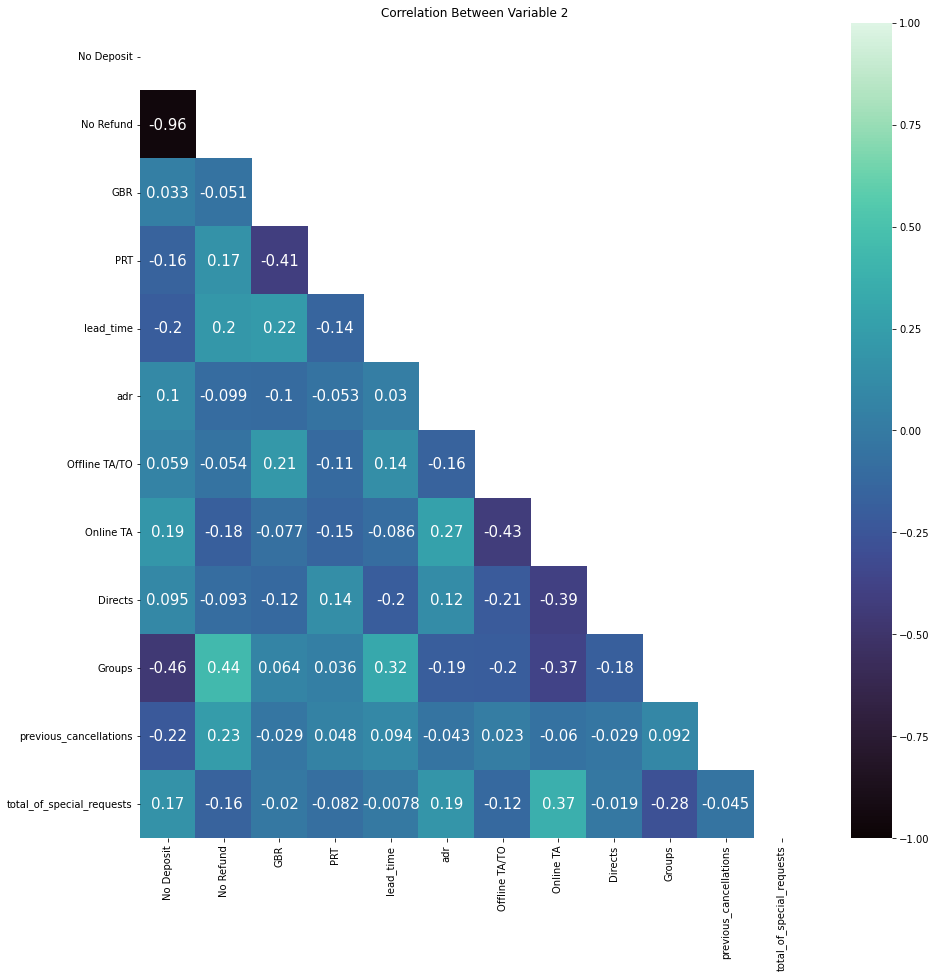

In [ ]:
##Let's find out the multicollinearity between the variables
corr_new = ['No Deposit', 'No Refund','GBR','PRT', 'lead_time', 'adr','Offline TA/TO', 'Online TA','Directs', 'Groups', 'previous_cancellations', 'total_of_special_requests' ]

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable 2')

mask = np.triu(np.ones_like(
    final_data[corr_new].corr(), dtype=np.bool))
sns.heatmap(final_data[corr_new].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":15})

plt.show()

In [ ]:
##Identify the x and y values
x = final_data[['No Refund','GBR','PRT', 'lead_time', 'required_car_parking_spaces', 'Online TA', 'previous_cancellations', 'total_of_special_requests' ]];
y = final_data[['is_canceled']].values.ravel();
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   No Refund                    40060 non-null  float64
 1   GBR                          40060 non-null  float64
 2   PRT                          40060 non-null  float64
 3   lead_time                    40060 non-null  int64  
 4   required_car_parking_spaces  40060 non-null  int64  
 5   Online TA                    40060 non-null  float64
 6   previous_cancellations       40060 non-null  int64  
 7   total_of_special_requests    40060 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 2.4 MB


In [ ]:
##Creating an LR Model
model_1 = LogisticRegression(fit_intercept=True, solver='newton-cg', class_weight = 'balanced', random_state=0)

In [ ]:
model_1.fit(x, y)

LogisticRegression(class_weight='balanced', random_state=0, solver='newton-cg')

In [ ]:
#Evaluate the model accuracy
a1 = model_1.score(x, y)
print('Model 1 Accuracy: ', a1);

#how will our model perform if we take new unseen data
cvs_correlation_method_model_1 = cross_val_score(model_1, x, y,cv=5);
print("crossvalidation model 1 accuracy: \n", cvs_correlation_method_model_1);
print("avg crossvalidation model 1 accuracy:", np.mean(cvs_correlation_method_model_1));
print ('\n');

#Evaluate the Precision, Recall, and F1-Score
d = confusion_matrix(y, model_1.predict(x))
clf_report_model_1 = classification_report(y, model_1.predict(x))

print (f'Confussion Matrix for Model_1 : \n {d}')
print (f'Classification report for Model_1 : \n {clf_report_model_1}')


Model 1 Accuracy:  0.7993759360958562
crossvalidation model 1 accuracy: 
 [0.75549176 0.83836745 0.76310534 0.81764853 0.70132302]
avg crossvalidation model 1 accuracy: 0.7751872191712431


Confussion Matrix for Model_1 : 
 [[23530  5408]
 [ 2629  8493]]
Classification report for Model_1 : 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85     28938
           1       0.61      0.76      0.68     11122

    accuracy                           0.80     40060
   macro avg       0.76      0.79      0.77     40060
weighted avg       0.82      0.80      0.81     40060



In [ ]:
# feature importance

def linear_model_feature_importance(feature_col_names, coeff, stddevs, n_top=3, n_bottom=3, plotBar=True):
    if(coeff.shape[0] < (n_top+n_bottom)): raise Exception("coeff shape should be >= (n_top+n_bottom)");
    #features['Features'] = feature_col_names;
    #print(coeff.shape);print(stddevs.shape);
    feature_importance = coeff * stddevs;
    feature_positive = feature_importance > 0.0;
    features = pd.DataFrame({
        'Features':feature_col_names,
        'importance':feature_importance,
        'positive':feature_positive
    });
    features.sort_values(by=['importance'], ascending=True, inplace=True);
    features = features.reset_index(drop=True);
    #print(features);
    #select only n_top and n_bottom
    selectedIdx = [];
    for i in range(0, n_top): selectedIdx.append(i);
    for i in range(0, n_bottom): selectedIdx.append(coeff.shape[0]-n_bottom+i);
    features = features.loc[selectedIdx,:];
    features.set_index('Features', inplace=True);
    features.importance.plot(kind='barh', figsize=(10, 10),color = features.positive.map({True: 'blue', False: 'red'}), align='center');
    if(plotBar): plt.xlabel('Importance');
    plt.show();
    return features;

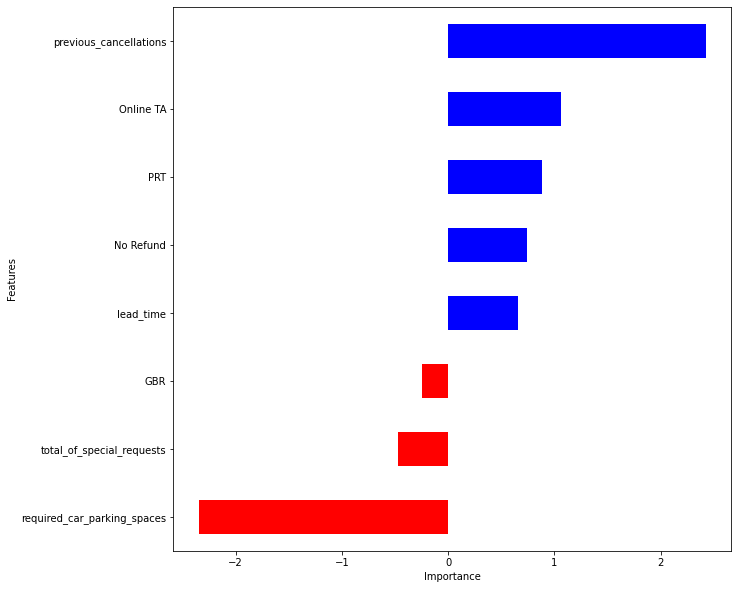

In [ ]:
linear_model_feature_importance(
  feature_col_names = x.columns,
  coeff = model_1.coef_[0], #feature importance for label 0
  stddevs = np.std(x).values,
  n_top = x.shape[1],
  n_bottom = 0
);

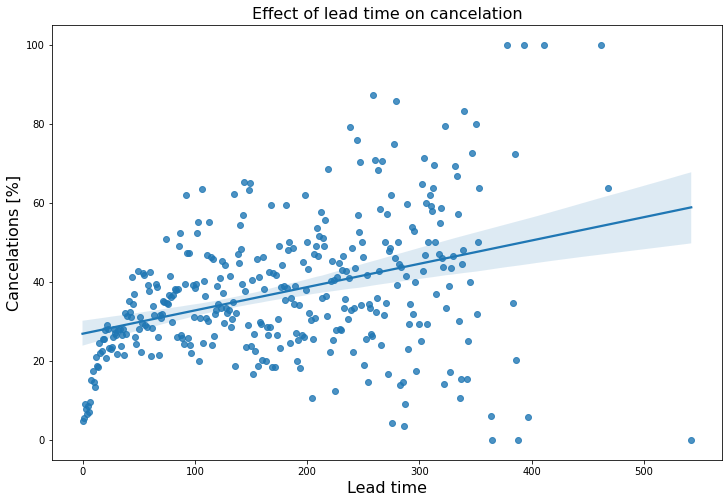

In [ ]:
# group data for lead_time:
lead_cancel_data = data_copy.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()



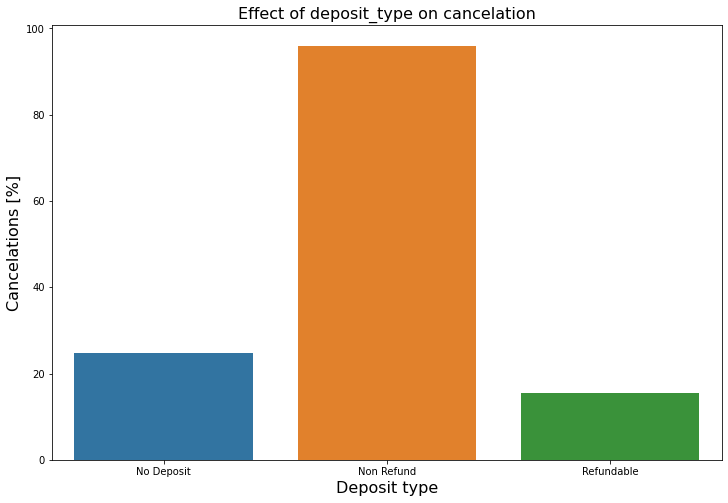

In [ ]:
# group data for deposit_type:
deposit_cancel_data = data_set.groupby('deposit_type')["is_canceled"].describe()

#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data["mean"] * 100)
plt.title("Effect of deposit_type on cancelation", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

In [ ]:
deposit_mean_data = data_set.groupby("deposit_type")[['is_canceled', 'lead_time', 'previous_cancellations']].mean()
deposit_mean_data

,is_canceled,lead_time,previous_cancellations
deposit_type,,,
No Deposit,0.247389,88.335323,0.035577
Non Refund,0.959860,183.766143,1.579988
Refundable,0.154930,157.556338,0.000000
